Model selection is the task of selecting a statistical model from a set of candidate models, given data. In the simplest cases, a pre-existing set of data is considered. Given candidate models of similar predictive or explanatory power, the simplest model is most likely to be the best choice.

The data is available in Google BigQuery that can be downloaded from here. The data is also publicly available at this Cloud Storage URL: https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv.

Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df = pd.read_csv('stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]
df.head(10)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


In [4]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

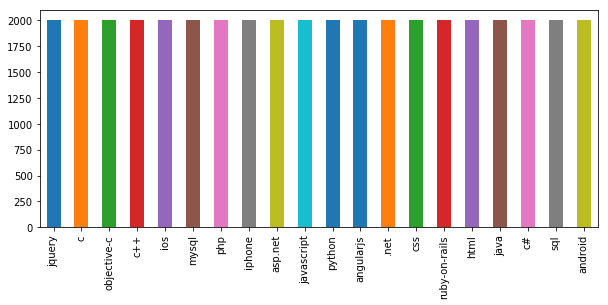

In [5]:
#We have over 10 million words in the data.


my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [6]:
#The classes are very well balanced.


def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [7]:
#Have a look a few post and tag pairs.

print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [8]:
print_plot(30)

how to chain expressions inside ngclass when using the {...}[] form  how can i add another expression to an <code>ng-class</code> directive that uses this form:   <pre><code>ng-class= {true: loading   false: loading-done }[data.loader===null]  </code></pre>   i d like to add something like this to the list:   <pre><code>{highlight:isspecial} </code></pre>   is it possible without expanding the first expression     thanks.
Tag: angularjs


In [9]:
#The text need to be cleaned up.


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [10]:
df['post'] = df['post'].apply(clean_text)

In [11]:

print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


In [12]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

In [13]:
#Now we have over 3 million words to work with.


X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


The next steps includes feature engineering. We will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). After that, we train several classifiers.

# Naive Bayes classifier for multinomial model

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7395
               precision    recall  f1-score   support

         java       0.63      0.65      0.64       613
         html       0.94      0.86      0.90       620
      asp.net       0.87      0.92      0.90       587
           c#       0.70      0.77      0.73       586
ruby-on-rails       0.73      0.87      0.79       599
       jquery       0.72      0.51      0.60       589
        mysql       0.77      0.74      0.75       594
          php       0.69      0.89      0.78       610
          ios       0.63      0.59      0.61       617
   javascript       0.57      0.65      0.60       587
       python       0.70      0.50      0.59       611
            c       0.79      0.78      0.79       594
          css       0.84      0.59      0.69       619
      android       0.66      0.84      0.74       574
       iphone       0.64      0.83      0.72       584
          sql       0.66      0.64      0.65       578
  objective-c       0.79      0.77      0.78    

# Linear support vector machine¶

In [16]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [17]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))


accuracy 0.7883333333333333
               precision    recall  f1-score   support

         java       0.74      0.67      0.70       613
         html       0.84      0.93      0.88       620
      asp.net       0.87      0.95      0.91       587
           c#       0.81      0.80      0.81       586
ruby-on-rails       0.74      0.88      0.81       599
       jquery       0.76      0.40      0.52       589
        mysql       0.83      0.68      0.75       594
          php       0.70      0.95      0.81       610
          ios       0.82      0.56      0.66       617
   javascript       0.72      0.59      0.65       587
       python       0.71      0.65      0.68       611
            c       0.81      0.87      0.84       594
          css       0.76      0.79      0.78       619
      android       0.83      0.86      0.85       574
       iphone       0.82      0.80      0.81       584
          sql       0.70      0.68      0.69       578
  objective-c       0.80      0.90  

# Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [19]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.783
               precision    recall  f1-score   support

         java       0.69      0.63      0.66       613
         html       0.91      0.91      0.91       620
      asp.net       0.97      0.94      0.95       587
           c#       0.79      0.77      0.78       586
ruby-on-rails       0.77      0.81      0.79       599
       jquery       0.60      0.58      0.59       589
        mysql       0.77      0.75      0.76       594
          php       0.82      0.85      0.83       610
          ios       0.70      0.71      0.71       617
   javascript       0.61      0.59      0.60       587
       python       0.64      0.63      0.63       611
            c       0.83      0.83      0.83       594
          css       0.78      0.78      0.78       619
      android       0.85      0.85      0.85       574
       iphone       0.81      0.83      0.82       584
          sql       0.65      0.64      0.64       578
  objective-c       0.82      0.85      0.83     

# BOW with keras

https://realpython.com/python-keras-text-classification/   (practical implimentation of text classification)

In [26]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [27]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 28000
Test size: 12000


In [28]:
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

In [29]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)


In [30]:

tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)


In [31]:

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)


In [32]:

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [33]:

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (28000, 1000)
x_test shape: (12000, 1000)
y_train shape: (28000, 20)
y_test shape: (12000, 20)


In [34]:
batch_size = 32
epochs = 2

In [35]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 25200 samples, validate on 2800 samples
Epoch 1/2
25200/25200 [==============================] - ETA: 9:00 - loss: 3.0374 - acc: 0.0000e+0 - ETA: 1:55 - loss: 3.0427 - acc: 0.0500    - ETA: 1:08 - loss: 2.9969 - acc: 0.069 - ETA: 47s - loss: 2.9566 - acc: 0.089 - ETA: 36s - loss: 2.9351 - acc: 0.10 - ETA: 31s - loss: 2.9067 - acc: 0.11 - ETA: 27s - loss: 2.8756 - acc: 0.13 - ETA: 25s - loss: 2.8503 - acc: 0.15 - ETA: 22s - loss: 2.8128 - acc: 0.17 - ETA: 20s - loss: 2.7715 - acc: 0.20 - ETA: 19s - loss: 2.7328 - acc: 0.22 - ETA: 18s - loss: 2.7039 - acc: 0.24 - ETA: 17s - loss: 2.6629 - acc: 0.26 - ETA: 16s - loss: 2.6326 - acc: 0.28 - ETA: 16s - loss: 2.5889 - acc: 0.30 - ETA: 15s - loss: 2.5559 - acc: 0.31 - ETA: 15s - loss: 2.5246 - acc: 0.32 - ETA: 14s - loss: 2.4938 - acc: 0.34 - ETA: 14s - loss: 2.4488 - acc: 0.35 - ETA: 13s - loss: 2.4205 - acc: 0.37 - ETA: 13s - loss: 2.3928 - acc: 0.38 - ETA: 13s - loss: 2.3550 - acc: 0.

25200/25200 [==============================] - ETA: 8s - loss: 0.9342 - acc: 0.625 - ETA: 12s - loss: 0.6378 - acc: 0.79 - ETA: 13s - loss: 0.5893 - acc: 0.80 - ETA: 12s - loss: 0.6468 - acc: 0.80 - ETA: 12s - loss: 0.6286 - acc: 0.81 - ETA: 12s - loss: 0.6264 - acc: 0.81 - ETA: 11s - loss: 0.6275 - acc: 0.81 - ETA: 10s - loss: 0.6083 - acc: 0.81 - ETA: 10s - loss: 0.5979 - acc: 0.81 - ETA: 10s - loss: 0.5979 - acc: 0.81 - ETA: 10s - loss: 0.5895 - acc: 0.82 - ETA: 9s - loss: 0.5871 - acc: 0.8194 - ETA: 9s - loss: 0.5748 - acc: 0.823 - ETA: 9s - loss: 0.5810 - acc: 0.821 - ETA: 9s - loss: 0.5805 - acc: 0.822 - ETA: 9s - loss: 0.5811 - acc: 0.822 - ETA: 9s - loss: 0.5855 - acc: 0.822 - ETA: 9s - loss: 0.5788 - acc: 0.824 - ETA: 8s - loss: 0.5716 - acc: 0.825 - ETA: 8s - loss: 0.5623 - acc: 0.828 - ETA: 8s - loss: 0.5629 - acc: 0.827 - ETA: 8s - loss: 0.5702 - acc: 0.826 - ETA: 8s - loss: 0.5740 - acc: 0.824 - ETA: 8s - loss: 0.5721 - acc: 0.823 - ETA: 8s - loss: 0.5676 - acc: 0.825 - ET

In [38]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

12000/12000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 33us/step
Test accuracy: 0.7956666666666666


In [39]:
score

[0.6367438935836156, 0.7956666666666666]